## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7        X8        X9       X10       X11       X12       X13         Y
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 



In [8]:
batch_size = 64
n_epochs = 5000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the train dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance V (1,0.01,0.1) to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548
0:	learn: 0.9928543	total: 47.7ms	remaining: 47.6s
1:	learn: 0.9735565	total: 48.5ms	remaining: 24.2s
2:	learn: 0.9533668	total: 49.4ms	remaining: 16.4s
3:	learn: 0.9340628	total: 50.4ms	remaining: 12.5s
4:	learn: 0.9184473	total: 51.2ms	remaining: 10.2s
5:	learn: 0.9043167	total: 52.1ms	remaining: 8.64s
6:	learn: 0.8861586	total: 53ms	remaining: 7.52s
7:	learn: 0.8694840	total: 53.9ms	remaining: 6.68s
8:	learn: 0.8538661	total: 54.8ms	remaining: 6.04s
9:	learn: 0.8360509	total: 55.8ms	remaining: 5.52s
10:	learn: 0.8216961	total: 56.6ms	remaining: 5.09s
11:	learn: 0.8062663	total: 57.5ms	remaining: 4.73s
12:	learn: 0.7900335	total: 58.4ms	remaining: 4.44s
13:	learn: 0.7749136	total: 59.4ms	remaining: 4.18s
14:	learn: 0.7625308	total: 60.3ms	remaining: 3.96s
15:	learn: 0.7488243	total: 61.2ms	remaining: 3.76s
16:	learn: 0.7369877	total: 62ms	remaining: 3.59s
17:	learn: 0.7235471	total: 62.9ms	remaining: 3.43s
18:	learn: 0.7103159	total: 63.7ms	remaining: 3.2

97:	learn: 0.3190439	total: 132ms	remaining: 1.21s
98:	learn: 0.3173648	total: 133ms	remaining: 1.21s
99:	learn: 0.3157558	total: 134ms	remaining: 1.2s
100:	learn: 0.3138658	total: 135ms	remaining: 1.2s
101:	learn: 0.3118180	total: 135ms	remaining: 1.19s
102:	learn: 0.3102784	total: 136ms	remaining: 1.19s
103:	learn: 0.3087703	total: 137ms	remaining: 1.18s
104:	learn: 0.3073594	total: 138ms	remaining: 1.17s
105:	learn: 0.3058928	total: 139ms	remaining: 1.17s
106:	learn: 0.3042815	total: 140ms	remaining: 1.16s
107:	learn: 0.3028218	total: 140ms	remaining: 1.16s
108:	learn: 0.3012470	total: 141ms	remaining: 1.15s
109:	learn: 0.2997746	total: 142ms	remaining: 1.15s
110:	learn: 0.2980689	total: 143ms	remaining: 1.15s
111:	learn: 0.2969276	total: 144ms	remaining: 1.14s
112:	learn: 0.2952583	total: 145ms	remaining: 1.14s
113:	learn: 0.2940346	total: 145ms	remaining: 1.13s
114:	learn: 0.2926279	total: 146ms	remaining: 1.13s
115:	learn: 0.2909735	total: 147ms	remaining: 1.12s
116:	learn: 0.289

257:	learn: 0.1877997	total: 269ms	remaining: 775ms
258:	learn: 0.1872720	total: 271ms	remaining: 774ms
259:	learn: 0.1869825	total: 271ms	remaining: 772ms
260:	learn: 0.1864498	total: 272ms	remaining: 771ms
261:	learn: 0.1861936	total: 273ms	remaining: 769ms
262:	learn: 0.1858583	total: 274ms	remaining: 768ms
263:	learn: 0.1855577	total: 275ms	remaining: 766ms
264:	learn: 0.1851779	total: 276ms	remaining: 765ms
265:	learn: 0.1846703	total: 277ms	remaining: 763ms
266:	learn: 0.1840244	total: 277ms	remaining: 762ms
267:	learn: 0.1837801	total: 278ms	remaining: 760ms
268:	learn: 0.1834765	total: 279ms	remaining: 759ms
269:	learn: 0.1829062	total: 280ms	remaining: 757ms
270:	learn: 0.1823236	total: 281ms	remaining: 755ms
271:	learn: 0.1820386	total: 282ms	remaining: 754ms
272:	learn: 0.1815048	total: 282ms	remaining: 752ms
273:	learn: 0.1810791	total: 283ms	remaining: 750ms
274:	learn: 0.1805398	total: 284ms	remaining: 749ms
275:	learn: 0.1800107	total: 285ms	remaining: 748ms
276:	learn: 

410:	learn: 0.1339772	total: 406ms	remaining: 582ms
411:	learn: 0.1337643	total: 408ms	remaining: 582ms
412:	learn: 0.1334897	total: 408ms	remaining: 581ms
413:	learn: 0.1331529	total: 409ms	remaining: 579ms
414:	learn: 0.1328554	total: 410ms	remaining: 578ms
415:	learn: 0.1326933	total: 411ms	remaining: 577ms
416:	learn: 0.1323648	total: 412ms	remaining: 576ms
417:	learn: 0.1320559	total: 413ms	remaining: 575ms
418:	learn: 0.1316771	total: 414ms	remaining: 574ms
419:	learn: 0.1314678	total: 415ms	remaining: 573ms
420:	learn: 0.1313581	total: 416ms	remaining: 572ms
421:	learn: 0.1310859	total: 417ms	remaining: 571ms
422:	learn: 0.1306850	total: 417ms	remaining: 569ms
423:	learn: 0.1303130	total: 418ms	remaining: 568ms
424:	learn: 0.1300147	total: 419ms	remaining: 567ms
425:	learn: 0.1296797	total: 420ms	remaining: 566ms
426:	learn: 0.1293767	total: 421ms	remaining: 565ms
427:	learn: 0.1292465	total: 422ms	remaining: 563ms
428:	learn: 0.1290568	total: 422ms	remaining: 562ms
429:	learn: 

569:	learn: 0.1014981	total: 542ms	remaining: 409ms
570:	learn: 0.1012927	total: 545ms	remaining: 409ms
571:	learn: 0.1010942	total: 545ms	remaining: 408ms
572:	learn: 0.1009553	total: 546ms	remaining: 407ms
573:	learn: 0.1008890	total: 547ms	remaining: 406ms
574:	learn: 0.1007339	total: 548ms	remaining: 405ms
575:	learn: 0.1005846	total: 549ms	remaining: 404ms
576:	learn: 0.1005442	total: 550ms	remaining: 403ms
577:	learn: 0.1003183	total: 551ms	remaining: 402ms
578:	learn: 0.1000741	total: 551ms	remaining: 401ms
579:	learn: 0.0999134	total: 552ms	remaining: 400ms
580:	learn: 0.0997737	total: 553ms	remaining: 399ms
581:	learn: 0.0996045	total: 554ms	remaining: 398ms
582:	learn: 0.0994236	total: 555ms	remaining: 397ms
583:	learn: 0.0992003	total: 556ms	remaining: 396ms
584:	learn: 0.0989505	total: 556ms	remaining: 395ms
585:	learn: 0.0987453	total: 557ms	remaining: 394ms
586:	learn: 0.0985803	total: 558ms	remaining: 393ms
587:	learn: 0.0984303	total: 559ms	remaining: 392ms
588:	learn: 

733:	learn: 0.0807885	total: 678ms	remaining: 246ms
734:	learn: 0.0806841	total: 680ms	remaining: 245ms
735:	learn: 0.0805735	total: 681ms	remaining: 244ms
736:	learn: 0.0804316	total: 682ms	remaining: 243ms
737:	learn: 0.0803813	total: 683ms	remaining: 242ms
738:	learn: 0.0802844	total: 683ms	remaining: 241ms
739:	learn: 0.0801801	total: 684ms	remaining: 240ms
740:	learn: 0.0801685	total: 685ms	remaining: 239ms
741:	learn: 0.0801120	total: 686ms	remaining: 239ms
742:	learn: 0.0798686	total: 687ms	remaining: 238ms
743:	learn: 0.0798405	total: 688ms	remaining: 237ms
744:	learn: 0.0797607	total: 689ms	remaining: 236ms
745:	learn: 0.0795224	total: 689ms	remaining: 235ms
746:	learn: 0.0794176	total: 690ms	remaining: 234ms
747:	learn: 0.0792176	total: 691ms	remaining: 233ms
748:	learn: 0.0790939	total: 692ms	remaining: 232ms
749:	learn: 0.0790219	total: 693ms	remaining: 231ms
750:	learn: 0.0789116	total: 694ms	remaining: 230ms
751:	learn: 0.0787534	total: 694ms	remaining: 229ms
752:	learn: 

899:	learn: 0.0652385	total: 816ms	remaining: 90.7ms
900:	learn: 0.0651766	total: 817ms	remaining: 89.8ms
901:	learn: 0.0650497	total: 818ms	remaining: 88.8ms
902:	learn: 0.0649290	total: 818ms	remaining: 87.9ms
903:	learn: 0.0648156	total: 819ms	remaining: 87ms
904:	learn: 0.0647811	total: 820ms	remaining: 86.1ms
905:	learn: 0.0647739	total: 821ms	remaining: 85.2ms
906:	learn: 0.0646112	total: 822ms	remaining: 84.3ms
907:	learn: 0.0645174	total: 823ms	remaining: 83.4ms
908:	learn: 0.0644461	total: 823ms	remaining: 82.4ms
909:	learn: 0.0644048	total: 824ms	remaining: 81.5ms
910:	learn: 0.0642865	total: 825ms	remaining: 80.6ms
911:	learn: 0.0641952	total: 826ms	remaining: 79.7ms
912:	learn: 0.0640711	total: 827ms	remaining: 78.8ms
913:	learn: 0.0640581	total: 828ms	remaining: 77.9ms
914:	learn: 0.0640051	total: 828ms	remaining: 76.9ms
915:	learn: 0.0639187	total: 829ms	remaining: 76ms
916:	learn: 0.0638793	total: 830ms	remaining: 75.1ms
917:	learn: 0.0638150	total: 831ms	remaining: 74.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

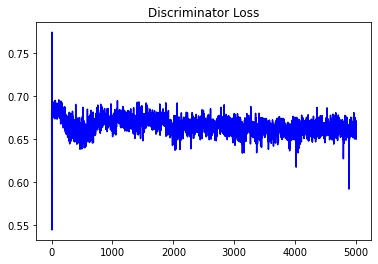

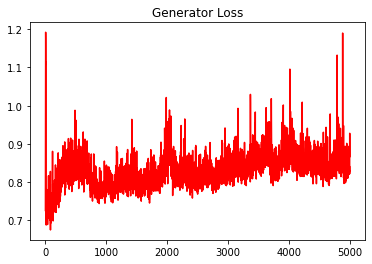

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

#### Sanity Checks 

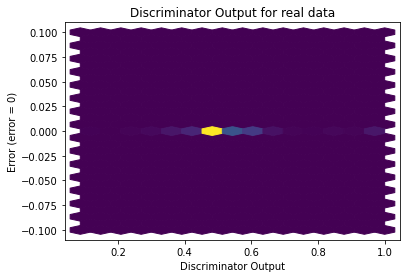

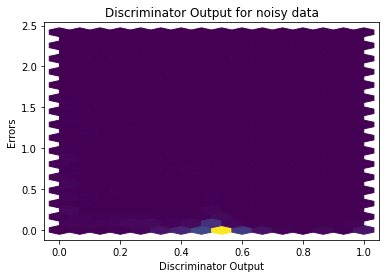

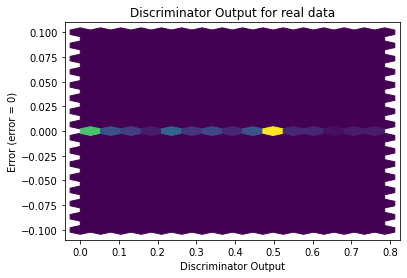

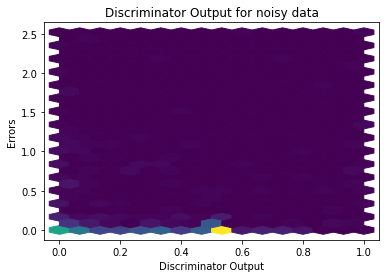

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


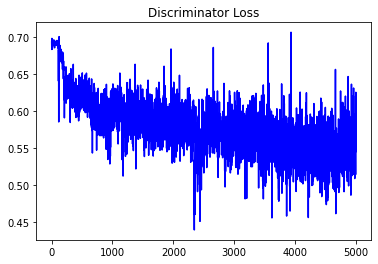

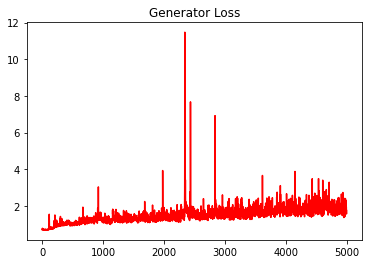

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)


In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

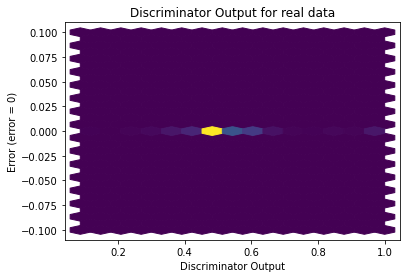

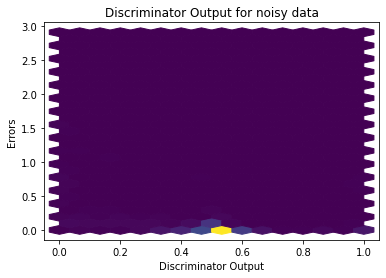

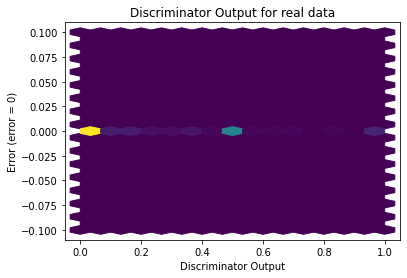

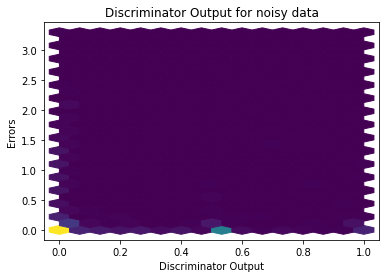

In [18]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[1.]], device='cuda:0', requires_grad=True)
